#### Laboratorio 10

Stefano Aragoni, Luis Diego Santos, Carol Arevalo

Para este ejercicio, hemos decidido trabajar con Algoritmos Genéticos aplicados a un problema de Ruteo de Vehículos (VRP). A continuación, se presenta el código segmentado y explicado en diferentes partes para cumplir con los requerimientos del laboratorio.

____
#### Importación de Librerías

In [1]:
import random
from deap import base, creator, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt


____
#### Definición de Clases Base y Parámetros del Problema

En esta sección, creamos las clases base para nuestro problema utilizando deap. FitnessMin es una clase para problemas de minimización. Individual representa a un individuo en nuestra población.

Definimos también los parámetros específicos de nuestro problema de ruteo de vehículos, como la ubicación del depósito, los clientes, las distancias entre ellos y la capacidad del vehículo.

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

depot = 0
customers = [(1, 4), (2, 6), (3, 3), (4, 2), (5, 6)]
distances = [
    [0, 2.8, 4.5, 7.2, 5.4, 8.4],
    [2.8, 0, 3.7, 4.4, 7.9, 5.3],
    [4.5, 3.7, 0, 2.8, 4.6, 2.2],
    [7.2, 4.4, 2.8, 0, 5.0, 2.5],
    [5.4, 7.9, 4.6, 5.0, 0, 4.2],
    [8.4, 5.3, 2.2, 2.5, 4.2, 0]
]
vehicle_capacity = 10


<font color='orange'>Función Objetivo/Fitness/Aptitud </font>

In [3]:
def evaluate_individual(individual):
    total_distance = 0
    current_demand = 0
    current_depot = depot
    
    for customer in individual:
        if customer == depot:
            current_demand = 0
            continue
        total_distance += distances[current_depot][customer]
        current_demand += customers[customer-1][1]
        if current_demand > vehicle_capacity:
            total_distance += distances[customer][depot]
            current_depot = depot
            current_demand = 0
    total_distance += distances[customer][depot]
    return total_distance,

In [4]:
def init_individual():
    individual = [depot] + random.sample(range(1, len(customers) + 1), len(customers))
    return creator.Individual(individual)


La función init_individual inicializa un individuo de manera aleatoria, mientras que evaluate_individual calcula la distancia total recorrida por un vehículo, teniendo en cuenta la capacidad del mismo.

#### Registro de Operadores Genéticos y Configuración del Algoritmo

Registramos los operadores gen  éticos y las funciones que hemos definido anteriormente en el toolbox. También configuramos los parámetros del algoritmo genético, como el tamaño de la población, el número de generaciones, y las probabilidades de cruzamiento y mutación.

A continuación se encuentran la <font color='orange'>función de Selección,  función de Crossover y función de Mutación </font>

In [5]:
toolbox.register("individual", tools.initIterate, creator.Individual, init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population_size = 100
num_generations = 100
cxpb = 0.8
mutpb = 0.2

population = toolbox.population(n=population_size)


_____
#### Ejecución del Algoritmo Genético y Resultados

Finalmente, ejecutamos el algoritmo genético, recopilamos estadísticas durante la ejecución y mostramos los resultados finales, incluyendo la mejor solución encontrada y su respectiva distancia total.

A continuación se encuentra la <font color='orange'>función de Ejecución</font>

In [6]:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox, cxpb, mutpb, num_generations, stats=stats, verbose=True)

best_individual = tools.selBest(population, 1)[0]
print("Mejor solución encontrada: ", best_individual)
print("Distancia total de la mejor solución: ", best_individual.fitness.values[0])


gen	nevals	min 	avg   
0  	100   	35.6	39.711
1  	84    	33.9	38.127
2  	84    	32.8	36.736
3  	84    	32.8	35.847
4  	82    	32.8	35.358
5  	82    	32.8	34.253
6  	88    	31.1	33.87 
7  	87    	31.1	33.164
8  	94    	31.1	33.158
9  	93    	31.1	33.206
10 	82    	31.1	32.95 
11 	80    	31.1	32.645
12 	73    	31.1	32.021
13 	86    	31.1	31.777
14 	78    	31.1	31.516
15 	82    	31.1	31.341
16 	76    	31.1	31.291
17 	82    	31.1	31.723
18 	87    	31.1	31.188
19 	87    	31.1	31.1  
20 	78    	31.1	31.16 
21 	79    	31.1	31.292
22 	81    	31.1	31.296
23 	79    	31.1	31.21 
24 	86    	31.1	31.217
25 	94    	31.1	31.232
26 	75    	31.1	31.233
27 	86    	31.1	31.229
28 	84    	31.1	31.1  
29 	86    	31.1	31.323
30 	87    	31.1	31.173
31 	79    	31.1	31.17 
32 	86    	31.1	31.358
33 	93    	31.1	31.36 
34 	88    	31.1	31.525
35 	90    	31.1	31.378
36 	78    	31.1	31.172
37 	96    	31.1	31.308
38 	80    	31.1	31.522
39 	78    	31.1	31.389
40 	90    	31.1	31.447
41 	90    	31.1	31.505
42 	80    	

Visualización de la Ruta

In [7]:
def plot_route(individual, customers, depot_location=(0, 0)):
    # Convertir la ruta en coordenadas
    route = [depot_location] + [customers[c-1] for c in individual if c != 0] + [depot_location]
    route = np.array(route)

    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(route[:, 0], route[:, 1], marker='o')

    # Anotar los clientes y el depósito
    for i, (x, y) in enumerate(route):
        plt.text(x, y, f' {i}' if i != 0 else ' Depot', fontsize=12)

    plt.title('Visualización de la Ruta')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.grid(True)
    plt.show()

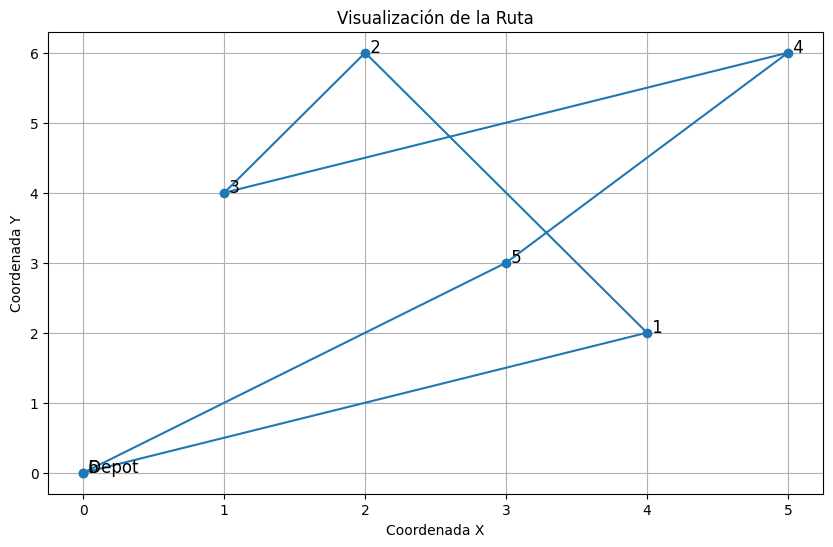

In [8]:
# Ejecutar la función de visualización con la mejor solución encontrada
plot_route(best_individual, customers, depot_location=(0, 0))

____
#### Conclusión y Observaciones

*Resultados*

Después de 100 generaciones de evolución, el algoritmo genético ha encontrado una solución óptima o cerca de la óptima para el problema planteado. La mejor solución encontrada tiene una distancia total de aproximadamente 31.1 unidades. Esta solución representa la secuencia de clientes a visitar que minimiza la distancia total recorrida, considerando las restricciones y la capacidad del vehículo.

*Observaciones*

1. **Convergencia**: Basándonos en los valores mínimos y promedio por generación, se puede observar que el algoritmo converge hacia una solución óptima. Esto es una buena señal de que los operadores genéticos y los parámetros seleccionados están trabajando de manera efectiva.

2. **Diversidad**: Aunque el algoritmo está convergiendo, también es importante notar que la diversidad (variedad de soluciones) se mantiene a lo largo de las generaciones. Esto es crucial para evitar caer en óptimos locales y asegurarse de explorar adecuadamente el espacio de soluciones.

3. **Selección de Parámetros**: Los parámetros como el tamaño de la población, la probabilidad de cruzamiento (cxpb) y la probabilidad de mutación (mutpb) son cruciales para el desempeño del algoritmo. Una selección adecuada de estos parámetros puede llevar a una convergencia más rápida y a soluciones más precisas.

4. **Efectividad de los Operadores Genéticos**: Los operadores de cruzamiento y mutación seleccionados son adecuados para el tipo de codificación y problema abordado. Esto se refleja en la mejora constante de las soluciones a lo largo de las generaciones.

5. **Estabilidad**: El algoritmo muestra una tendencia estable hacia la mejora, sin presentar fluctuaciones significativas en el valor de la función objetivo. Esto indica que el equilibrio entre exploración y explotación es adecuado.

*Conclusión*

El uso de algoritmos genéticos ha demostrado ser una herramienta poderosa para la optimización de problemas complejos y combinatorios. A través de la evolución y selección natural, es posible encontrar soluciones óptimas o cercanas a la óptima de manera eficiente. En este caso particular, se ha aplicado con éxito para optimizar la ruta de un vehículo, minimizando la distancia total recorrida y respetando las restricciones de capacidad.

El experimento también destaca la importancia de una buena definición de la función de aptitud, operadores genéticos y parámetros del algoritmo, ya que estos elementos son clave para el éxito de la optimización.

#### Referencias: